<a href="https://colab.research.google.com/github/JulianDR26/Se-ales-y-Sistemas-2024-1S/blob/main/Parcial2SyS_Grupo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SOLUCIÓN EXAMEN 2 DE SEÑALES Y SISTEMAS


*   Jose Alejandro Velasco Mondragón
*   David Santiago Salazar
*   Julian David Rivera Prada




## PUNTO 1:
Encuentre la expresion del espectro de Fourier (forma exponencial y trigonom ´ etrica) para la señal ˜ x(t) = |A cos(2πF ot)|
2
, con t ∈
[−
1
2Fo
,
1
2Fo
], con A, Fo ∈ R
+. Realice las simulaciones respectivas para graficar el espectro de Fourier del ejercicio 1 (magnitud
y fase como diagrama de Bode en decibelios), y presente el error relativo y la senal reconstruida para ˜ N = {1, 2, . . . , 50}.

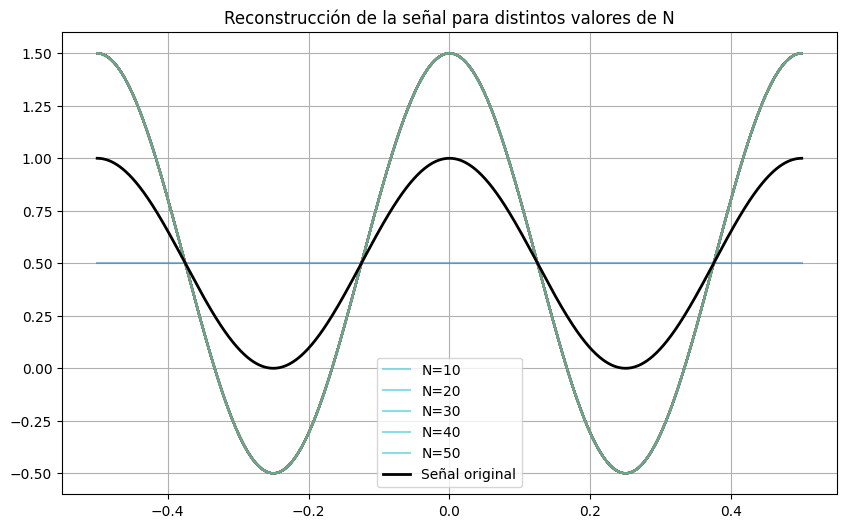

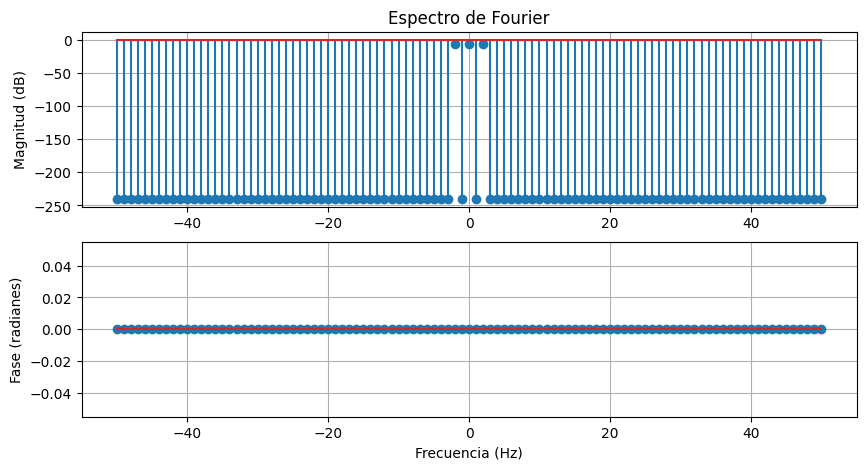

Error relativo: 0.577158


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 1      # Amplitud
Fo = 1     # Frecuencia fundamental
T = 1/Fo   # Período fundamental
t = np.linspace(-T/2, T/2, 1000)

# Definición de la señal x(t)
def x_t(t, A, Fo):
    return (A * np.cos(2 * np.pi * Fo * t))**2

# Graficar la reconstrucción de la señal para distintos valores de N
plt.figure(figsize=(10, 6))

for N in range(1, 51):
    c_n = np.zeros(2*N+1, dtype=complex)
    n_vals = np.arange(-N, N+1)

    for n in n_vals:
        if abs(n) == 2:
            c_n[n + N] = A**2 / 2
        elif n == 0:
            c_n[n + N] = A**2 / 2
        else:
            c_n[n + N] = 0

    t_recon = np.linspace(-T/2, T/2, 1000)
    x_recon = np.zeros_like(t_recon, dtype=complex) # Initialize x_recon as a complex array

    for n, c in zip(n_vals, c_n):
        x_recon += c * np.exp(1j * 2 * np.pi * n * Fo * t_recon)

    x_recon = x_recon.real  # Tomar solo la parte real

    plt.plot(t_recon, x_recon, label=f"N={N}" if N % 10 == 0 else "", alpha=0.5)

plt.plot(t_recon, x_t(t_recon, A, Fo), 'k', linewidth=2, label="Señal original")
plt.legend()
plt.grid()
plt.title("Reconstrucción de la señal para distintos valores de N")
plt.show()

# Cálculo del espectro de Fourier
N = 50  # Número de términos para la transformada
c_n = np.zeros(2*N+1, dtype=complex)
n_vals = np.arange(-N, N+1)

for n in n_vals:
    if abs(n) == 2:
        c_n[n + N] = A**2 / 2
    elif n == 0:
        c_n[n + N] = A**2 / 2
    else:
        c_n[n + N] = 0

# Magnitud y fase del espectro de Fourier
mag = np.abs(c_n)
phase = np.angle(c_n)

# Graficar espectro de magnitud y fase en decibelios
freqs = n_vals * Fo
mag_db = 20 * np.log10(mag + 1e-12)  # Evitar log(0)

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.stem(freqs, mag_db)
plt.ylabel("Magnitud (dB)")
plt.title("Espectro de Fourier")
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(freqs, phase)
plt.ylabel("Fase (radianes)")
plt.xlabel("Frecuencia (Hz)")
plt.grid()
plt.show()

# Cálculo del error relativo
t_recon = np.linspace(-T/2, T/2, 1000)
x_recon = np.zeros_like(t_recon, dtype=complex)

for n, c in zip(n_vals, c_n):
    x_recon += c * np.exp(1j * 2 * np.pi * n * Fo * t_recon)

x_recon = x_recon.real  # Tomar solo la parte real

error = np.linalg.norm(x_recon - x_t(t_recon, A, Fo)) / np.linalg.norm(x_t(t_recon, A, Fo))
print(f"Error relativo: {error:.6f}")


In [ ]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 1      # Amplitud
Fo = 1     # Frecuencia fundamental
T = 1/Fo   # Período fundamental
t = np.linspace(-T/2, T/2, 1000)

# Definición de la señal x(t)
def x_t(t, A, Fo):
    return (A * np.cos(2 * np.pi * Fo * t))**2
# ... (Your existing signal reconstruction and FFT code) ...

st.title("Signal Analysis Dashboard")

# Input for N (number of Fourier terms)
N = st.slider("Number of Fourier Terms (N)", 1, 50, 25)

# ... (Your signal reconstruction code using N) ...

# Plot the reconstructed signal
st.header("Reconstructed Signal")
fig, ax = plt.subplots()
plt.plot(t_recon, x_recon, label=f"N={N}", alpha=0.5)
plt.plot(t_recon, x_t(t_recon, A, Fo), 'k', linewidth=2, label="Señal original")
plt.legend()
plt.grid()
plt.title("Reconstrucción de la señal para distintos valores de N")
st.pyplot(fig)

# ... (Your Fourier spectrum calculation code) ...

# Plot the magnitude spectrum
st.header("Magnitude Spectrum")
fig, ax = plt.subplots()
plt.stem(freqs, mag_db)
plt.ylabel("Magnitud (dB)")
plt.title("Espectro de Fourier")
plt.grid()
st.pyplot(fig)

# ... (Add more sections for phase spectrum, error, etc.) ...

## PUNTO 2

 Sea la señal portadora $c(t)=A_c\sin(2\pi F_c t)$, con $Ac, Fc\in \mathbb{R}$, y la señal mensaje $m(t) \in \mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t)= \left(1+\frac{m(t)}{A_c}\right)c(t)$. Luego, descargue desde youtube 5 segundos de su canción
favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la canción escogida). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la señal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada. Nota: se sugiere utilizar un canal de señal de audio para el desarrollo del ejercicio. El usuario debe poder escoger el índice de modulación deseado.

1. instalacion de librerias

In [ ]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

     / 2.7 MB 10.5 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2928467 sha256=23643b2a243238091811ead7e689f91be5ea5dcdde8cb29257864cb7316760d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-ltfq3noi/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp


2. Descargar el audio de youtube y convertirlo a .wav

In [ ]:
import os #  Permite manipular el sistema de archivos
import yt_dlp as youtube_dl #para descargar audios desde YouTube.
import subprocess #Permite ejecutar comandos de terminal, como la conversión de audio con ffmpeg.
import numpy as np
import soundfile as sf #Para leer y escribir archivos de audio.
import matplotlib.pyplot as plt

# Crear carpeta 'results' si no existe
if not os.path.exists("results"):
    os.makedirs("results")

# Función para descargar MP3 desde YouTube y convertirlo a WAV
def download_ytvid_as_wav(video_url, name):
    # Definir nombres de archivos
    mp3_filename = f"results/{name}.mp3" # se establece la ruta exacta del archivo f"results/{name}.mp3"
    wav_filename = f"results/{name}.wav"

    # Descargar el archivo en formato MP3
    options = {
        'format': 'bestaudio/best',
        'keepvideo': False,
        'outtmpl': mp3_filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_url])

    print(f"✅ Descarga completada: {mp3_filename}")

    # Convertir MP3 a WAV
    subprocess.call(['ffmpeg', '-y', '-i', mp3_filename, wav_filename])

    print(f"✅ Conversión a WAV completada: {wav_filename}")

    return wav_filename

# Descargar y convertir la canción
video_url = input("introdusca el url del video de youtube :")  # Reemplaza con la URL de tu video de YouTube
wav_filename = download_ytvid_as_wav(video_url, input("introdusca el nombre de la cancion sin extenciones:"))  # Nombre del archivo sin extensión

# Definir el nombre del archivo de fragmento
fragmento_path = "results/fragmento.wav"

# Recortar el fragmento de 5 segundos (20s a 25s)
subprocess.call(['ffmpeg', '-y', '-i', wav_filename, '-ss', '20', '-t', '5', fragmento_path])
print(f"✅ Fragmento guardado en: {fragmento_path}")

introdusca el url del video de youtube :https://youtu.be/yG7MPEQm1-w?si=zFe7Ut_X9Xr-5snv
introdusca el nombre de la cancion sin extenciones:ahoratepuedesmarchar_luismig
[youtube] Extracting URL: https://youtu.be/yG7MPEQm1-w?si=zFe7Ut_X9Xr-5snv
[youtube] yG7MPEQm1-w: Downloading webpage
[youtube] yG7MPEQm1-w: Downloading tv client config
[youtube] yG7MPEQm1-w: Downloading player 0f7c1eff
[youtube] yG7MPEQm1-w: Downloading tv player API JSON
[youtube] yG7MPEQm1-w: Downloading ios player API JSON
[youtube] yG7MPEQm1-w: Downloading m3u8 information
[info] yG7MPEQm1-w: Downloading 1 format(s): 251
[download] Destination: results/ahoratepuedesmarchar_luismig.mp3
[download] 100% of    2.94MiB in 00:00:00 at 6.05MiB/s   
✅ Descarga completada: results/ahoratepuedesmarchar_luismig.mp3
✅ Conversión a WAV completada: results/ahoratepuedesmarchar_luismig.wav
✅ Fragmento guardado en: results/fragmento.wav


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import os
import yt_dlp as youtube_dl
import subprocess

Fc = 48000  # Frecuencia de portadora (cumple con niquist)
Im = float(input("Introduce el índice de modulación: "))  # Permite ingresar el índice de modulación

#El índice de modulación controla la amplitud de la señal modulada en AM.
#Si Im < 1, la modulación es submodulada .
#Si Im = 1, es modulación normal .
#Si Im > 1, es sobremodulada (puede distorsionarse).

# Cargar el fragmento de audio (5s de la canción)
fragmento_cargado, fs = sf.read("results/fragmento.wav")
# se busca en la ruta donde esta guardado

# Verificar si el audio es estéreo y convertir a mono si es necesario
if len(fragmento_cargado.shape) > 1:
  # detecta numeor de canales si es mayor a 1 promedia
    fragment = fragmento_cargado.mean(axis=1)  # Promedio de canales para convertir a mono
else:
    fragment = fragmento_cargado

# Generar el vector de tiempo
t = np.arange(0, len(fragment)) / fs

#Crea un vector de tiempo basado en la cantidad de muestras y la frecuencia de muestras ( fs).

# Calcular la amplitud de la portadora
Ac = np.max(np.abs(fragment)) / Im if np.max(np.abs(fragment)) != 0 else 1

#Calcula la amplitud de la portadora Ac en función de la señal de audio.


# Generar la señal portadora
carrier = Ac * np.sin(2 * np.pi * Fc * t)
#Genera una onda seno ( sin) con la frecuencia Fc.

# Modulación AM
y = (1 + (fragment / Ac)) * carrier

# Normalizar las señales para asegurarnos de que están dentro del rango [-1, 1]
#de esta manera se puede escuchar el audio
fragment = fragment / np.max(np.abs(fragment))  # Normaliza la señal mensaje
carrier = carrier / np.max(np.abs(carrier))    # Normaliza la señal portadora
y = y / np.max(np.abs(y))                      # Normaliza la señal modulada

# Guardar los audios en archivos WAV
sf.write("results/mensaje.wav", fragmento_cargado, fs)
sf.write("results/portadora.wav", carrier, fs)
sf.write("results/modulada.wav", y, fs)
print("🎵 Los archivos WAV se han guardado exitosamente:")

Introduce el índice de modulación: 0.5
🎵 Los archivos WAV se han guardado exitosamente:


3.
- cargar el archivo .wav
- extraer el fragmento deseado
- crear la portadora
- modular la señal

In [ ]:
!pip install soundfile #instalar sondfile

In [ ]:
from IPython.display import Audio, display

# Reproducir los audios por separado
print("🎵 Reproduciendo mensaje...")
display(Audio("results/mensaje.wav"))

print("🎵 Reproduciendo portadora...")
display(Audio("results/portadora.wav"))

print("🎵 Reproduciendo señal modulada...")
display(Audio("results/modulada.wav"))

🎵 Reproduciendo mensaje...


🎵 Reproduciendo portadora...


🎵 Reproduciendo señal modulada...


4. Graficar señales en el tiempo

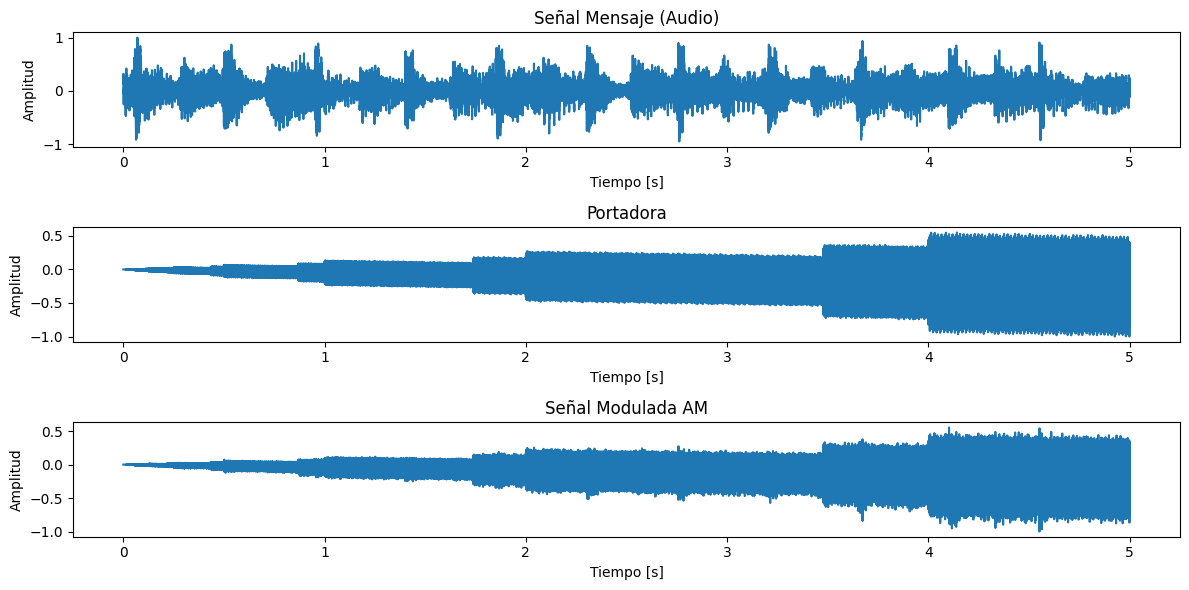

In [ ]:
# Graficar señales en el dominio del tiempo
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, fragment)
plt.title("Señal Mensaje (Audio)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.subplot(3, 1, 2)
plt.plot(t, carrier)
plt.title("Portadora")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.subplot(3, 1, 3)
plt.plot(t, y)
plt.title("Señal Modulada AM")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

5. Transformada de Fourier y graficar en frecuencia

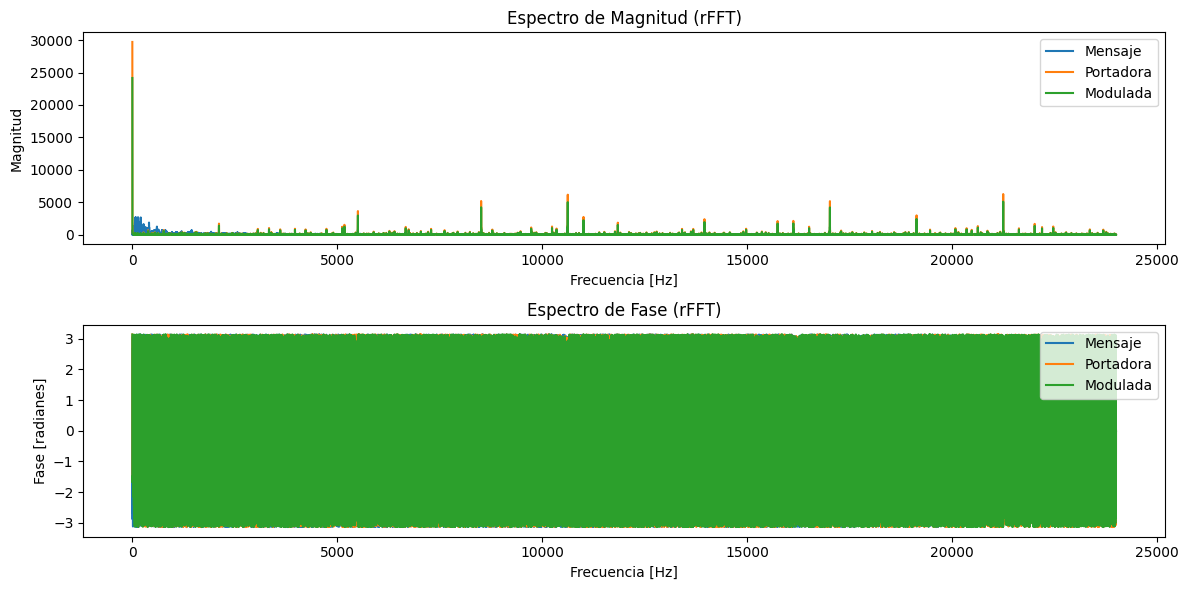

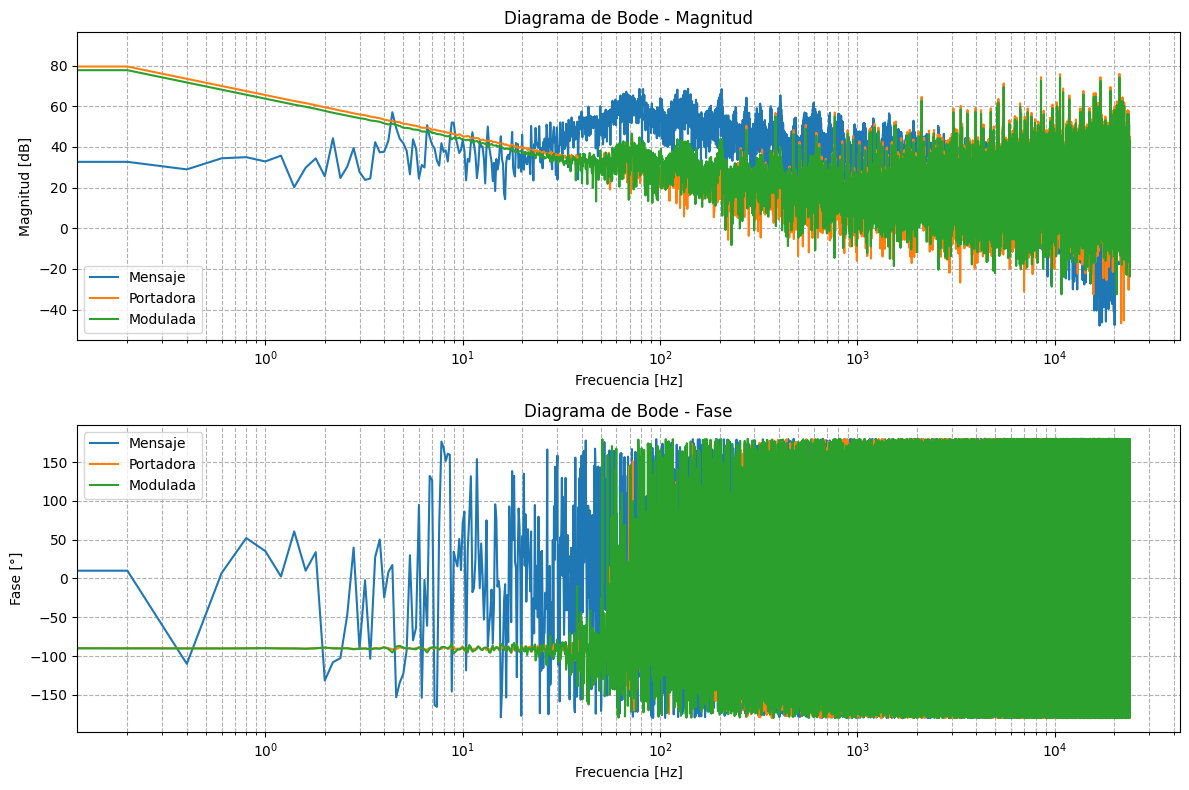

In [ ]:
# Aplicar la Transformada de Fourier Real (rFFT)
Xf_m = np.fft.rfft(fragment)  # FFT de la señal mensaje
Xf_c = np.fft.rfft(carrier)   # FFT de la portadora
Xf_y = np.fft.rfft(y)         # FFT de la señal modulada

#Devuelve solo N/2+1valores (frecuencias positivas)

#Como nuestras señales de audio son reales , su espectro es simétrico . rfft()Evite calcular la parte redundante, haciéndolo más eficiente y reduciendo el uso de memoria.

# Generar el eje de frecuencias
freqs = np.fft.rfftfreq(len(fragment), 1 / fs)

# Graficar espectro de magnitud
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(freqs, abs(Xf_m), label='Mensaje')
plt.plot(freqs, abs(Xf_c), label='Portadora')
plt.plot(freqs, abs(Xf_y), label='Modulada')
plt.legend()
plt.title("Espectro de Magnitud (rFFT)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")

# Graficar espectro de fase
plt.subplot(2, 1, 2)
plt.plot(freqs, np.angle(Xf_m), label='Mensaje')
plt.plot(freqs, np.angle(Xf_c), label='Portadora')
plt.plot(freqs, np.angle(Xf_y), label='Modulada')
plt.legend()
plt.title("Espectro de Fase (rFFT)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Fase [radianes]")

plt.tight_layout()
plt.show()

#________________________________________________________________________
# Convertir la magnitud a decibelios (evitar log(0) sumando un valor muy pequeño)
Xf_m_db = 20 * np.log10(np.abs(Xf_m) + 1e-12)
Xf_c_db = 20 * np.log10(np.abs(Xf_c) + 1e-12)
Xf_y_db = 20 * np.log10(np.abs(Xf_y) + 1e-12)

# Fase en radianes
phase_m = np.angle(Xf_m)
phase_c = np.angle(Xf_c)
phase_y = np.angle(Xf_y)

# Graficar diagramas de Bode
plt.figure(figsize=(12, 8))

# Magnitud en dB
plt.subplot(2, 1, 1)
plt.semilogx(freqs, Xf_m_db, label='Mensaje')
plt.semilogx(freqs, Xf_c_db, label='Portadora')
plt.semilogx(freqs, Xf_y_db, label='Modulada')
plt.legend()
plt.title("Diagrama de Bode - Magnitud")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.grid(True, which="both", linestyle="--")

# Fase en radianes
plt.subplot(2, 1, 2)
plt.semilogx(freqs, np.degrees(phase_m), label='Mensaje')
plt.semilogx(freqs, np.degrees(phase_c), label='Portadora')
plt.semilogx(freqs, np.degrees(phase_y), label='Modulada')
plt.legend()
plt.title("Diagrama de Bode - Fase")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Fase [°]")
plt.grid(True, which="both", linestyle="--")

plt.tight_layout()
plt.show()

## PUNTO 3
Consulte en que consiste la distorsión total de armónicos (Total Harmonic Distortion-(THD)) y el factor de potencia en un circuito electrico. ¿Cómo puede calcularse el THD desde la FFT?. Cómo puede calcularse la distorsión del factor de potencia con base al THD?. Genere un ejemplo ilustrativo para el calculo del THD y la distorsión del factor de potencia para un rectificador de onda completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias para las simulaciones. El
usuario podra escoger diferentes valores de R y C. Discuta los resultados obtenidos.

CONSULTA DE LA DISTORSION TOTAL DE ARMONICOS:



¿En qué consiste la distorsión total de armónicos y el factor de potencia de un circuito? (THD)

La distorsión total de armónicos es definida como la cuantificación de qué tanto se distrosiónan los armónicos presentes en una señal. De esa manera, las deformaciones presentes en la gráfica con respecto al tiempo de señales de tensión y corriente (para el caso particular del sistema eléctrico) representan la distorsión de armónicos que suele ser causada por diferentes fenómenos como:
- Transitorios
- Operación en estado estable

¿Cómo puede calcularse la distorsión del factor de potencia con base al THD?
Al tratar el tema de armónicos, THD y factor de potencia, se plantea una relación natural e intrínseca entre los conceptos antes mencionados. La distorsión armónica total se puede definir como la manera en la que la cantidad de distorsión generada por frecuencias armónicas afecta un sistema eléctrico. De la teoría de circuitos, se define el factor de potencia como la medida de eficiencia que alcanza un circuito en términos de conversión de energía en energía útil. Por las definiciones presentadas anteriormente, es posible encontrar la relación entre los conceptos de THD y de factor de potencia poniendo todo el análisis en términos de la eficiencia del sistema.

Así, de manera matemática, la expresión que relaciona el factor de potencia con el THD es la siguiente:

$$ PF_{THD} = \sqrt{\frac{1}{1 + (THD)^2}} $$



Ingrese el valor de la resistencia (ohmios): 100
Ingrese el valor de la capacitancia (faradios, 0 para circuito R): 0.00003


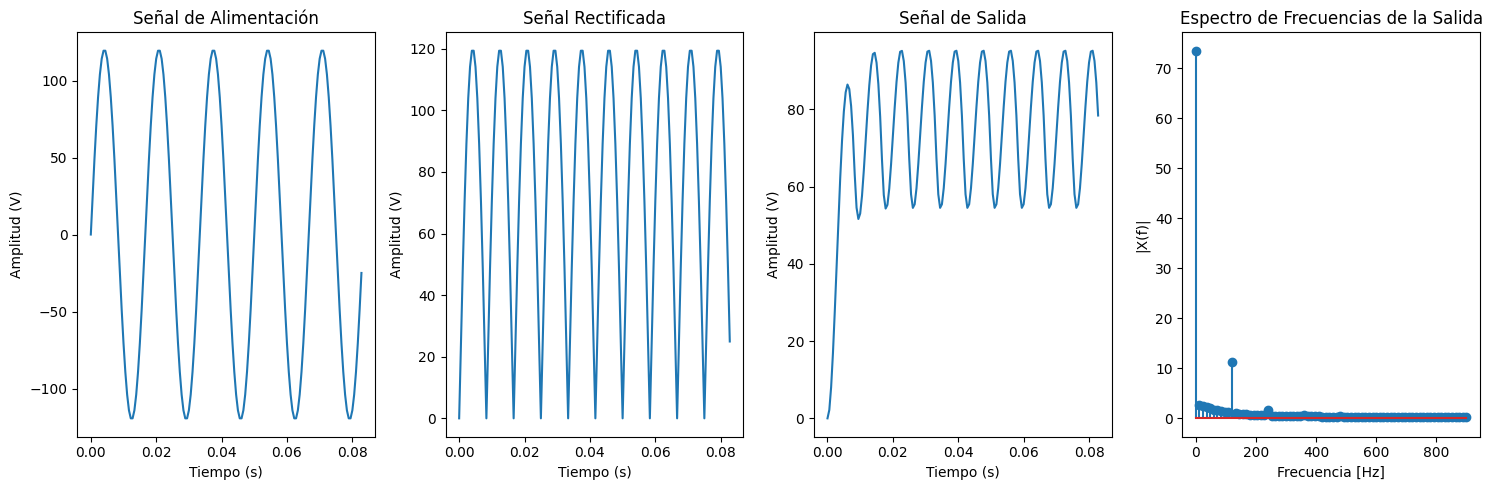

THD (Distorsión Armónica Total): 34.16%
Factor de Potencia: 0.95


In [ ]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

def simulate_circuit(R, C):
    # Parámetros de simulación ajustables
    A = 120  # Amplitud de entrada (A)
    Fo = 60  # Frecuencia de entrada (Fo) en Hz

    # Parámetros de simulación
    Fs = 30 * Fo  # Frecuencia de muestreo
    To = 1 / Fo    # Periodo fundamental
    Ts = 1 / Fs    # Periodo de muestreo
    t = np.arange(0, 5 * To, Ts)  # Simulando 5 periodos

    # Función de entrada: señal senoidal rectificada completa
    in_o = A * np.sin(2 * np.pi * Fo * t)  # Señal sinosoidal de alimentación
    in_ = np.abs(in_o)  # Entrada rectificada completa

    if C > 0:
        # Circuito RC
        num = np.array([1])  # Numerador
        den = np.array([R * C, 1])  # Denominador
        G_n = sig.TransferFunction(num, den)
        _, out_signal, _ = sig.lsim(G_n, in_, t)  # Simulación de la respuesta
    else:
        # Circuito R (sin capacitancia)
        out_signal = in_

    # Visualización de resultados
    fig, axs = plt.subplots(1, 4, figsize=(15, 5)) #Inicializa una disposición de una fila con 4 imágenes

    #Primera gráfica: señal de alimentación
    axs[0].plot(t, in_o)
    axs[0].set_title("Señal de Alimentación")
    axs[0].set_xlabel("Tiempo (s)")
    axs[0].set_ylabel("Amplitud (V)")
    #Segunda gráfica: Señal rectificada
    axs[1].plot(t, in_)
    axs[1].set_title("Señal Rectificada")
    axs[1].set_xlabel("Tiempo (s)")
    axs[1].set_ylabel("Amplitud (V)")
    #Tercera gráfica: Señal de salida
    axs[2].plot(t, out_signal)
    axs[2].set_title("Señal de Salida")
    axs[2].set_xlabel("Tiempo (s)")
    axs[2].set_ylabel("Amplitud (V)")
    #Cuarta gráfica: Espectro en frecuencias de la salida
    vfre = np.fft.rfftfreq(len(out_signal), 1 / Fs)
    Xf = np.fft.rfft(out_signal)
    axs[3].stem(vfre, np.abs(Xf) / len(out_signal))
    axs[3].set_xlabel('Frecuencia [Hz]')
    axs[3].set_ylabel('|X(f)|')
    axs[3].set_title("Espectro de Frecuencias de la Salida")

    plt.tight_layout()
    plt.show()

    # Cálculo del THD
    def calculate_thd(signal, Fs, Fo):
        N = len(signal)
        Y = np.fft.rfft(signal)
        Y = 2.0 / N * np.abs(Y)
        fundamental_index = int(2 * Fo * N / Fs)
        if fundamental_index >= len(Y):
            return float('nan')
        fundamental = Y[fundamental_index]
        harmonics = np.sqrt(np.sum(Y[fundamental_index+1:] ** 2))
        THD = harmonics / fundamental if fundamental != 0 else float('inf')
        return THD

    THD = calculate_thd(out_signal, Fs, Fo)
    print(f"THD (Distorsión Armónica Total): {THD:.2%}")

    # Cálculo del factor de potencia
    def calculate_power_factor(THD):
        return np.sqrt(1 / (1 + THD ** 2))

    FP = calculate_power_factor(THD)
    print(f"Factor de Potencia: {FP:.2f}")

# Parámetros ingresados por el usuario
R_input = float(input("Ingrese el valor de la resistencia (ohmios): "))
C_input = float(input("Ingrese el valor de la capacitancia (faradios, 0 para circuito R): "))

simulate_circuit(R_input, C_input)


## PUNTO 4
Desarrolle un sistema para identificar una palabra clave y autenticar al hablante utilizando herramientas basadas en la Transformada
de Fourier. El sistema debe presentarse como un Dashboard en Streamlit y cumplir con las siguientes condiciones: i) Permitir el
acceso unicamente si un miembro del grupo pronuncia la palabra clave. ii) Denegar el acceso en cualquier otro caso. ´
Ademas, se debe presentar y describir el esquema de soluci ´ on que incluya: i) Dise ´ no del sistema de detecci ˜ on. ii) La base de ´
datos creada para almacenar los patrones de voz y palabras clave. iii) Las consideraciones tecnicas para implementar la soluci ´ on, ´
incluyendo el uso de la Transformada de Fourier para procesar las senales de voz.

In [ ]:
!pip install pydub
import os
import pandas as pd
import gdown # Permite descargar archivos desde Google Drive.
import requests#Usado para hacer solicitudes HTTP, como descargar el archivo CSV desde Google Sheets.
from io import BytesIO#Permite tratar los datos binarios (como la respuesta de la solicitud HTTP) como un archivo en memoria
from pydub import AudioSegment

# Función para descargar el archivo desde Google Sheets
def descargar_csv_google_sheets(sheet_url):
    # Convertir el enlace de Google Sheets a enlace de descarga directa
    file_id = sheet_url.split("/d/")[1].split("/")[0]
    download_url = f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=csv"
    return download_url

# Descargar archivo CSV de "palabras" desde Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1gwLO2NXxBKnM2urol12aTqn9_HOhT-q1/edit?usp=sharing&ouid=115292432287984287407&rtpof=true&sd=true"
download_url = descargar_csv_google_sheets(sheet_url)

response = requests.get(download_url, stream=True)

# Convertir el contenido descargado a un archivo CSV
excel_data = BytesIO(response.content)

# Cargar el CSV en un DataFrame
df = pd.read_csv(excel_data)

# Verifica si se cargaron los datos correctamente
print("Base de datos cargada con éxito ✅")
print(df.head())  # Muestra las primeras filas para verificar

# Crear carpeta para guardar los audios
if not os.path.exists("audios1"):
    os.mkdir("audios1")

# Mostrar las columnas disponibles para confirmar el nombre de 'id_clave'
print(df.columns)

# Descargar los audios desde Google Drive
for index, row in df.iterrows():
    audio_url = row["link"]
    user = row["usuario"]
    tipo = row["type"]  # Ya corregido en la versión anterior
    identificador = row["id_clave"] if "id_clave" in df.columns else "desconocido"  # Verificar columna

    output_file = f"audios1/{user}_{tipo}_{identificador}.wav"

    # Descargar archivo
    gdown.download(audio_url, output_file, quiet=False)

print("Descarga de audios completada ✅")

Base de datos cargada con éxito ✅
                                                link      usuario      type  \
0  https://drive.google.com/file/d/1w-6iYOrKUlMba...     santiago     clave   
1  https://drive.google.com/file/d/1OPcZljn-DYjrn...    Alejandro     clave   
2  https://drive.google.com/file/d/1aKIOFoaQcrDmE...       julian     clave   
3  https://drive.google.com/file/d/11tc93_7A4Qq8r...  desconocido  no clave   
4  https://drive.google.com/file/d/1DbwXPT-npuEq6...  desconocido  no clave   

   type_num  
0         1  
1         1  
2         1  
3         2  
4         2  
Index(['link', 'usuario', 'type', 'type_num'], dtype='object')


/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1w-6iYOrKUlMba2IQNTI35Qv0xGpORMNP
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1w-6iYOrKUlMba2IQNTI35Qv0xGpORMNP/view?usp=sharing
To: /content/audios1/santiago_clave_desconocido.wav
93.3kB [00:00, 32.9MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1OPcZljn-DYjrnmHRUh6ERaxOkUAkc6jG
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1OPcZljn-DYjrnmHRUh6ERaxOkUAkc6jG/view?usp=sharing
To: /content/audios1/Alejandro_clave_desconocido.wav
93.4kB [00:00, 5.33MB/s]
/usr/local/lib/python3.11/dist-pa

Descarga de audios completada ✅


Base de datos cargada con éxito ✅
                                                link      usuario      type  \
0  https://drive.google.com/file/d/1w-6iYOrKUlMba...     santiago     clave   
1  https://drive.google.com/file/d/1OPcZljn-DYjrn...    Alejandro     clave   
2  https://drive.google.com/file/d/1aKIOFoaQcrDmE...       julian     clave   
3  https://drive.google.com/file/d/11tc93_7A4Qq8r...  desconocido  no clave   
4  https://drive.google.com/file/d/1DbwXPT-npuEq6...  desconocido  no clave   

   type_num  
0         1  
1         1  
2         1  
3         2  
4         2  


Downloading...
From: https://drive.google.com/uc?id=1w-6iYOrKUlMba2IQNTI35Qv0xGpORMNP
To: /content/audios_originales/santiago_clave_1.wav
100%|██████████| 21.1k/21.1k [00:00<00:00, 35.7MB/s]


Segmentación completada para audios_originales/santiago_clave_1.converted.wav: 10 fragmentos guardados.


Downloading...
From: https://drive.google.com/uc?id=1OPcZljn-DYjrnmHRUh6ERaxOkUAkc6jG
To: /content/audios_originales/Alejandro_clave_1.wav
100%|██████████| 25.9k/25.9k [00:00<00:00, 15.2MB/s]


Segmentación completada para audios_originales/Alejandro_clave_1.converted.wav: 11 fragmentos guardados.


Downloading...
From: https://drive.google.com/uc?id=1aKIOFoaQcrDmEx5g84kuAcORyU_VHtHZ
To: /content/audios_originales/julian_clave_1.wav
100%|██████████| 33.1k/33.1k [00:00<00:00, 46.0MB/s]


Segmentación completada para audios_originales/julian_clave_1.converted.wav: 12 fragmentos guardados.


Downloading...
From: https://drive.google.com/uc?id=11tc93_7A4Qq8rRi2uCCrvr6zwesReSVM
To: /content/audios_originales/desconocido_no clave_2.wav
100%|██████████| 20.6k/20.6k [00:00<00:00, 31.8MB/s]


Segmentación completada para audios_originales/desconocido_no clave_2.converted.wav: 9 fragmentos guardados.
Segmentación completada para audios_originales/desconocido_no clave_2.converted.wav: 9 fragmentos guardados.
Segmentación completada para audios_originales/desconocido_no clave_2.converted.wav: 9 fragmentos guardados.
Proceso de descarga y segmentación finalizado ✅


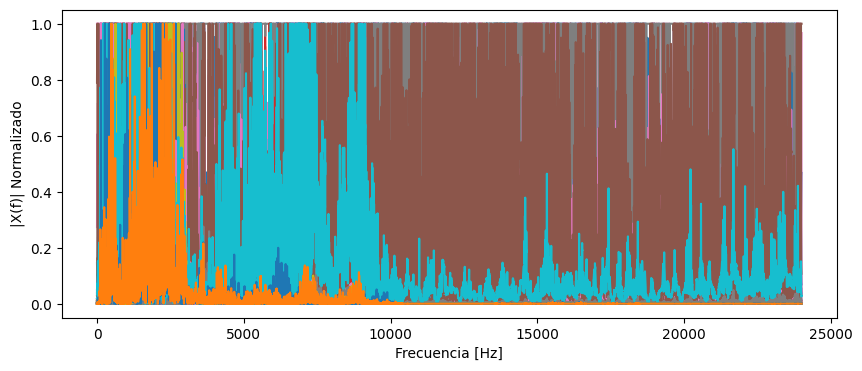

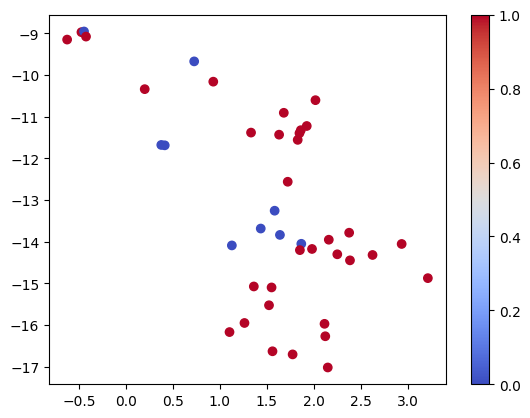

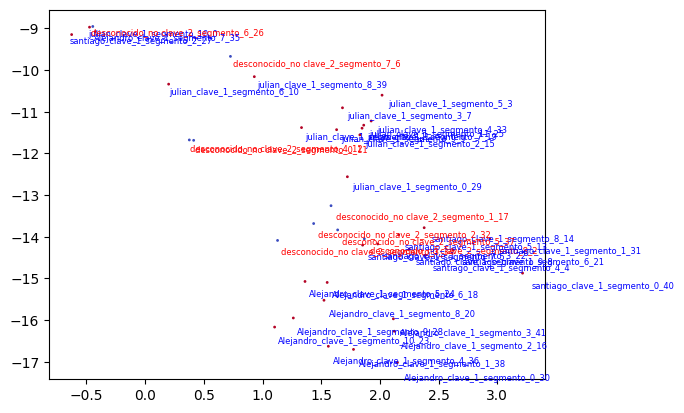

In [ ]:
!pip install pydub
!pip install soundfile #instalar sondfile

import os
import pandas as pd
import gdown
import requests
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from io import BytesIO
from pydub import AudioSegment, silence
from pydub.utils import mediainfo
from scipy.fft import rfft, rfftfreq
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

# Verificar la disponibilidad de libsndfile
try:
    import soundfile as sf
except OSError:
    print("Error: No se encontró la biblioteca 'libsndfile'. Asegúrate de que esté instalada correctamente.")
    exit(1)

# Función para convertir un link de Google Drive a descarga directa
def convertir_link_google_drive(url):
    if "drive.google.com" in url and "/file/d/" in url:
        file_id = url.split("/d/")[1].split("/")[0]
        return f"https://drive.google.com/uc?id={file_id}"
    return url

# Función para descargar el archivo CSV desde Google Sheets
def descargar_csv_google_sheets(sheet_url):
    file_id = sheet_url.split("/d/")[1].split("/")[0]
    download_url = f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=csv"
    return download_url

# Descargar archivo CSV con la base de datos
sheet_url = "https://docs.google.com/spreadsheets/d/1gwLO2NXxBKnM2urol12aTqn9_HOhT-q1/edit?usp=sharing"
download_url = descargar_csv_google_sheets(sheet_url)
response = requests.get(download_url, stream=True)

df = pd.read_csv(BytesIO(response.content))
print("Base de datos cargada con éxito ✅")
print(df.head())

# Crear carpetas para guardar los audios
os.makedirs("audios_originales", exist_ok=True)
os.makedirs("audios_segmentados", exist_ok=True)

# Descargar y procesar los audios
for index, row in df.iterrows():
    audio_url = convertir_link_google_drive(row["link"])
    user, tipo, identificador = row["usuario"], row["type"], row["type_num"]
    input_file = f"audios_originales/{user}_{tipo}_{identificador}.wav"
    #descarga los audios y los clasifica

    if not os.path.exists(input_file):
        gdown.download(audio_url, input_file, quiet=False)

    try:
      # Verificar formato y convertir si es necesario
        info = mediainfo(input_file)
        formato = info.get("format_name", "desconocido")
        if formato != "wav":
            audio = AudioSegment.from_file(input_file)
            input_file_wav = input_file.replace(".wav", ".converted.wav")
            audio.export(input_file_wav, format="wav")
            input_file = input_file_wav
    except Exception as e:
        print(f"Error al leer el archivo {input_file}: {e}")
        continue
        #convienrte a formato .wav

     # Segmentar eliminando los silencios
    audio = AudioSegment.from_wav(input_file)
    segmentos = silence.split_on_silence(audio, min_silence_len=500, silence_thresh=audio.dBFS - 16, keep_silence=200)
    #divide los audios en fragmentos con base en umbrales de energía.

        # Guardar segmentos en una carpeta
    for i, segmento in enumerate(segmentos):
        output_file = f"audios_segmentados/{user}_{tipo}_{identificador}_segmento_{i}.wav"
        segmento.export(output_file, format="wav")
    print(f"Segmentación completada para {input_file}: {len(segmentos)} fragmentos guardados.")
    #guarda los audios secmentados y los clasifica

print("Proceso de descarga y segmentación finalizado ✅")

# Procesamiento de los segmentos de audio
wav_files = [f for f in os.listdir("audios_segmentados") if f.endswith(".wav")]
ts = 1 # Duración esperada en segundos
fs = 48000# Frecuencia de muestreo
x_t = []
labels = []
names = []

for name in wav_files:
    try:
        x, fs = sf.read(os.path.join("audios_segmentados", name))
        if x.ndim > 1: # Convertir a 1 solo canal
            x = x.mean(axis=1)

        target_length = ts * fs
        if len(x) < target_length:
            x = np.pad(x, (0, target_length - len(x)), 'constant') # Rellenar con ceros
        else:
            x = x[:target_length]

         # Etiquetado
        x_t.append(x)
        if "santiago" in name or "julian" in name or "Alejandro" in name and "clave" in name and "_1_" in name:
            labels.append(1)  # Azul
        else:
            labels.append(0)  # Rojo
        names.append(name)
    except Exception as e:
        print(f"Error al leer el archivo {name}: {e}")
        continue

x_t = np.array(x_t)
labels = np.array(labels)

# Transformada de Fourier
vf = rfftfreq(x_t.shape[1], 1/fs)
Xw = rfft(x_t, axis=1)

# Normalización
sca = MinMaxScaler()
Xw_norm = sca.fit_transform(abs(Xw))

# Reducción de dimensionalidad con t-SNE
red_ = TSNE(perplexity=20, n_components=2, random_state=123, learning_rate='auto', init='pca')
X_2D = red_.fit_transform(Xw_norm)

# Gráficos
plt.figure(figsize=(10, 4))
plt.plot(vf, Xw_norm.T)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X(f)| Normalizado')
plt.show()

# Graficar separabilidad 2D
plt.scatter(X_2D[:,0], X_2D[:,1], c=labels, cmap='coolwarm')
plt.colorbar()
plt.show()

# Graficar con nombres diferenciados por color
plt.scatter(X_2D[:,0], X_2D[:,1], c=labels, cmap='coolwarm', s=1)
for i, tex in enumerate(names):
    color = 'blue' if labels[i] == 1 else 'red'
    plt.text(X_2D[i,0]*1.025, X_2D[i,1]*1.025, tex[:-4]+"_"+str(i), fontsize=6, color=color)

plt.show()
